<a href="https://colab.research.google.com/github/Akiri12/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACERCA DEL COLAB

El presente Colab es parte del primer proyecto en el proceso de formación en Ciencia de Datos de Alura Latam, para lo cual se utilizará Python y algunas de sus bibliotecas como pandas y matplotlib.

# INFORME

**Objetivos generales:**
A partir de las bases de datos obtenidas de 4 tiendas, sugerir qué tienda debería cerrar para invertir en un nuevo negocio.

**Objetivos específicos:**
**Métricas**
1. Facturación total de cada tienda
2. Categorías más populares
3. Promedio de calificación de los clientes
4. Productos más y menos vendidos
5. Costo promedio de los envíos

**Análisis**
1. Ventas totales y ticket promedio por tienda, donde ticket promedio se calcula como $\frac{\text{ventas totales}}{\text{número de transacciones}}$.
2. Índice de satisfacción promedio por tienda.
3. Costo de envío como porcentaje del precio.
4. Tendencia de ventas por mes.
5. Métodos de pago más usados por tienda.

**Conclusión:**
El Señor debería cerrar la tienda 4.



# PYTHON


### Importación de datos



In [36]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/Akiri12/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/Akiri12/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/Akiri12/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/Akiri12/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Suma tienda 1: 1150880400.0
Suma tienda 2: 1116343500.0
Suma tienda 3: 1098019600.0
Suma tienda 4: 1038375700.0


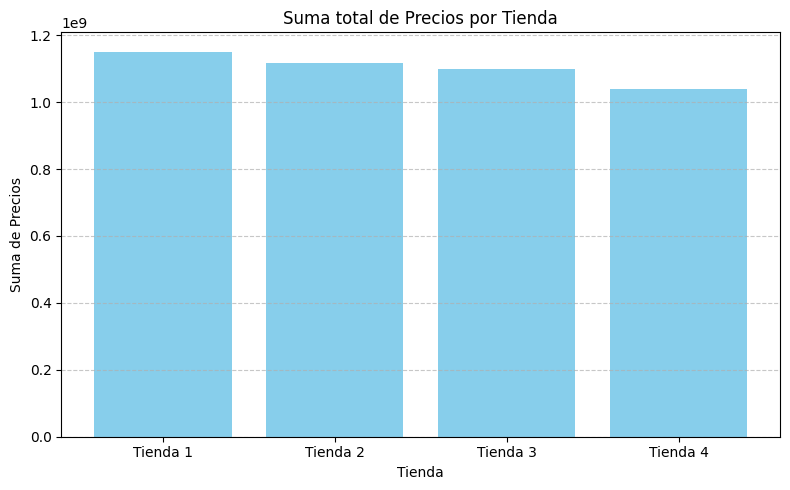

In [3]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
suma_total_por_tienda = []

for i, tienda in enumerate(tiendas, start=1):
    suma = tienda['Precio'].sum()
    suma_total_por_tienda.append(suma)
    print(f"Suma tienda {i}: {suma}")

# Crear lista de sumas
suma_precios = [tienda['Precio'].sum() for tienda in tiendas]

# Nombres de tiendas
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, suma_precios, color='skyblue')
plt.title('Suma total de Precios por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Suma de Precios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [4]:
# Primero hallamos todas las categorías únicas en cada una de las 4 tiendas

categorias_unicas = pd.concat([
    tienda1['Categoría del Producto'],
    tienda2['Categoría del Producto'],
    tienda3['Categoría del Producto'],
    tienda4['Categoría del Producto']
]).unique()

print("Categorías únicas entre todas las tiendas:")
print(categorias_unicas)


Categorías únicas entre todas las tiendas:
['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos'
 'Artículos para el hogar' 'Deportes y diversión' 'Libros'
 'Instrumentos musicales']


Conociendo los nombres de las categorías, procedemos a calcular los precios por categorías para cada tienda.

In [6]:
def suma_por_categoria(tienda, nombre_tienda):
    resultado = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    resultado.columns = ['Categoría del Producto', f'Suma_{nombre_tienda}']
    return resultado

# Aplicamos la función a cada tienda
cat_t1 = suma_por_categoria(tienda1, 'Tienda1')
cat_t2 = suma_por_categoria(tienda2, 'Tienda2')
cat_t3 = suma_por_categoria(tienda3, 'Tienda3')
cat_t4 = suma_por_categoria(tienda4, 'Tienda4')

# Combinar los datos por "Categoría del Producto"
df_categorias = cat_t1.merge(cat_t2, on='Categoría del Producto', how='outer') \
                      .merge(cat_t3, on='Categoría del Producto', how='outer') \
                      .merge(cat_t4, on='Categoría del Producto', how='outer')

# Rellenar valores faltantes con 0 (por si alguna categoría no aparece en una tienda)
df_categorias.fillna(0, inplace=True)

# Mostrar el DataFrame final
print(df_categorias)



    Categoría del Producto  Suma_Tienda1  Suma_Tienda2  Suma_Tienda3  \
0  Artículos para el hogar    12698400.0    14746900.0    15060000.0   
1     Deportes y diversión    39290000.0    34744500.0    35593100.0   
2        Electrodomésticos   363685200.0   348567800.0   329237900.0   
3             Electrónicos   429493500.0   410831100.0   410775800.0   
4   Instrumentos musicales    91299000.0   104990300.0    77380900.0   
5                 Juguetes    17995700.0    15945400.0    19401100.0   
6                   Libros     8784900.0    10091200.0     9498700.0   
7                  Muebles   187633700.0   176426300.0   201072100.0   

   Suma_Tienda4  
0    15074500.0  
1    33350100.0  
2   283260200.0  
3   409476100.0  
4    75102400.0  
5    20262200.0  
6     9321300.0  
7   192528900.0  


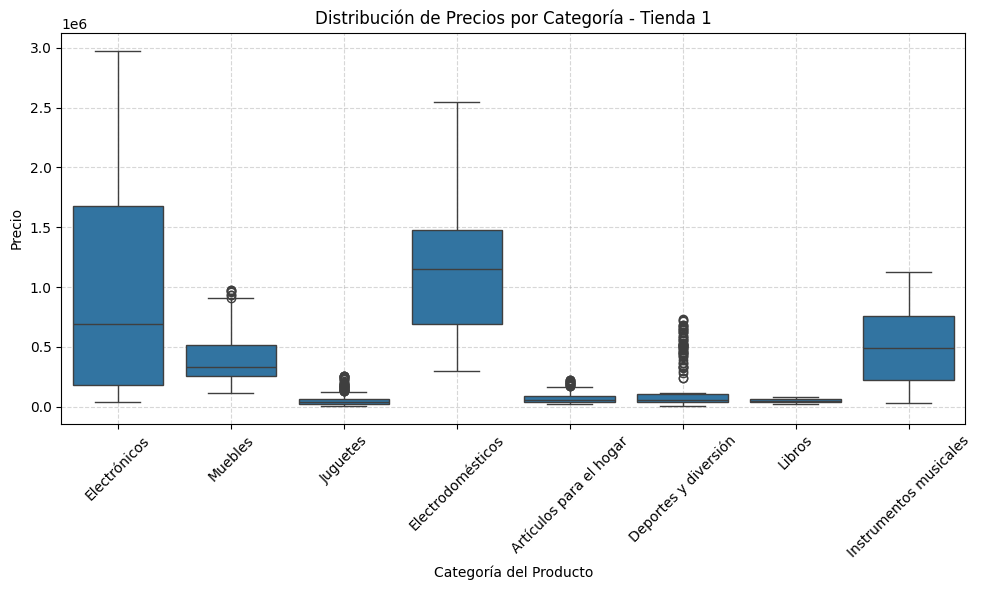

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=tienda1,
    x='Categoría del Producto',
    y='Precio'
)

plt.title('Distribución de Precios por Categoría - Tienda 1')
plt.xticks(rotation=45)
plt.ylabel('Precio')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



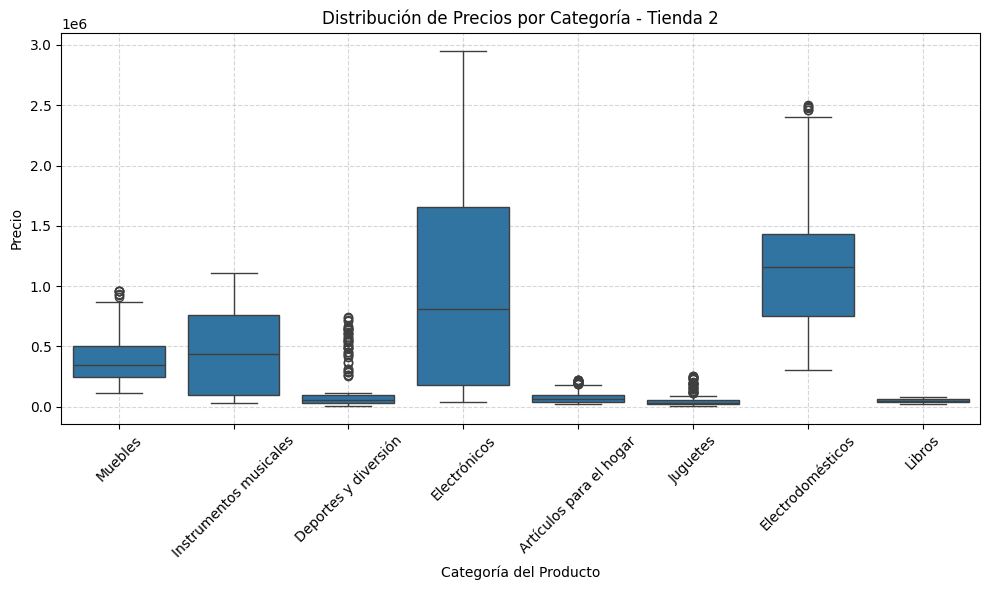

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=tienda2,
    x='Categoría del Producto',
    y='Precio'
)

plt.title('Distribución de Precios por Categoría - Tienda 2')
plt.xticks(rotation=45)
plt.ylabel('Precio')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

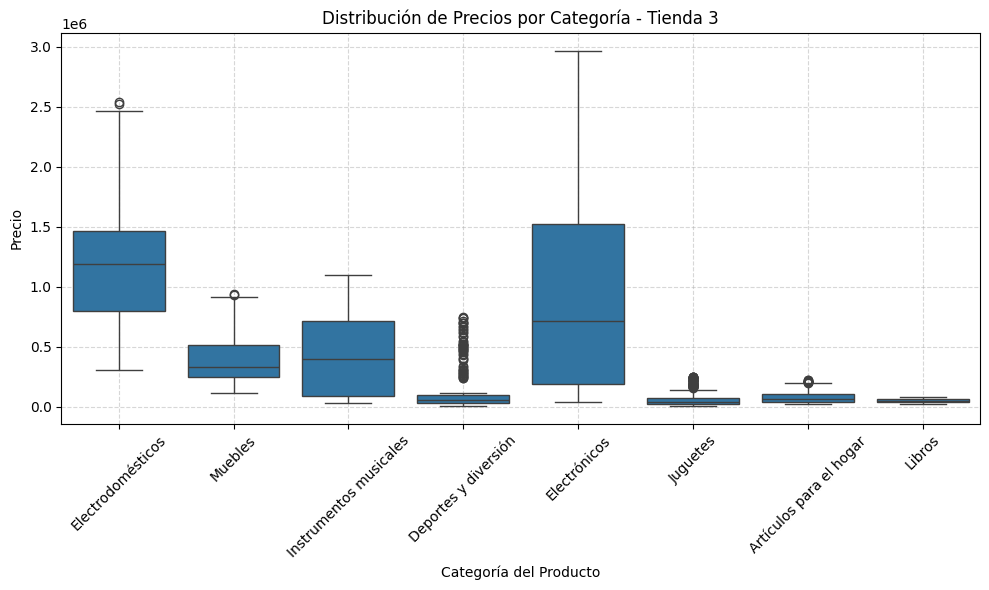

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=tienda3,
    x='Categoría del Producto',
    y='Precio'
)

plt.title('Distribución de Precios por Categoría - Tienda 3')
plt.xticks(rotation=45)
plt.ylabel('Precio')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

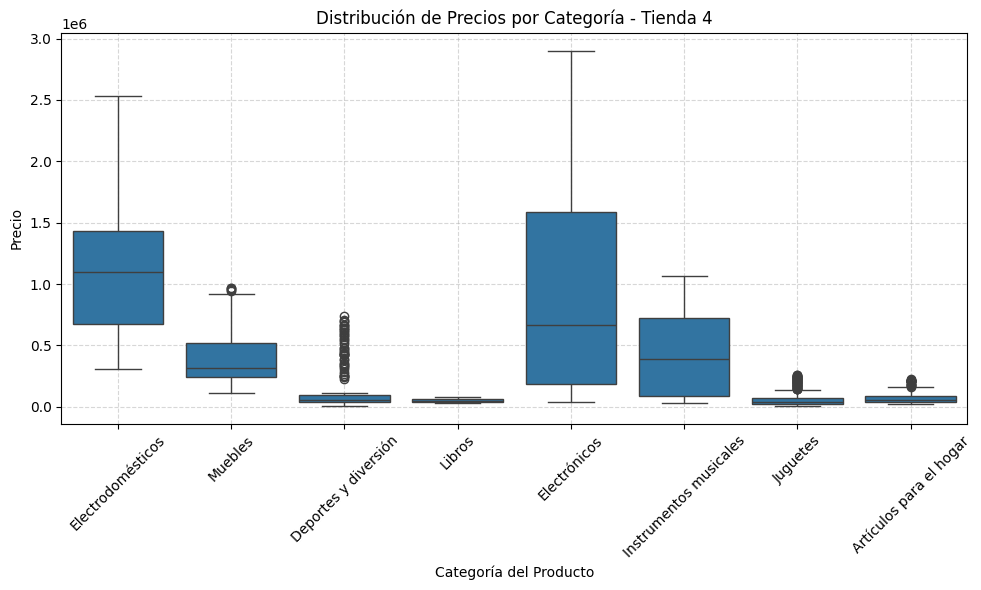

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=tienda4,
    x='Categoría del Producto',
    y='Precio'
)

plt.title('Distribución de Precios por Categoría - Tienda 4')
plt.xticks(rotation=45)
plt.ylabel('Precio')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Visualizamos el resumen de las cuatro tiendas simultáneamente:


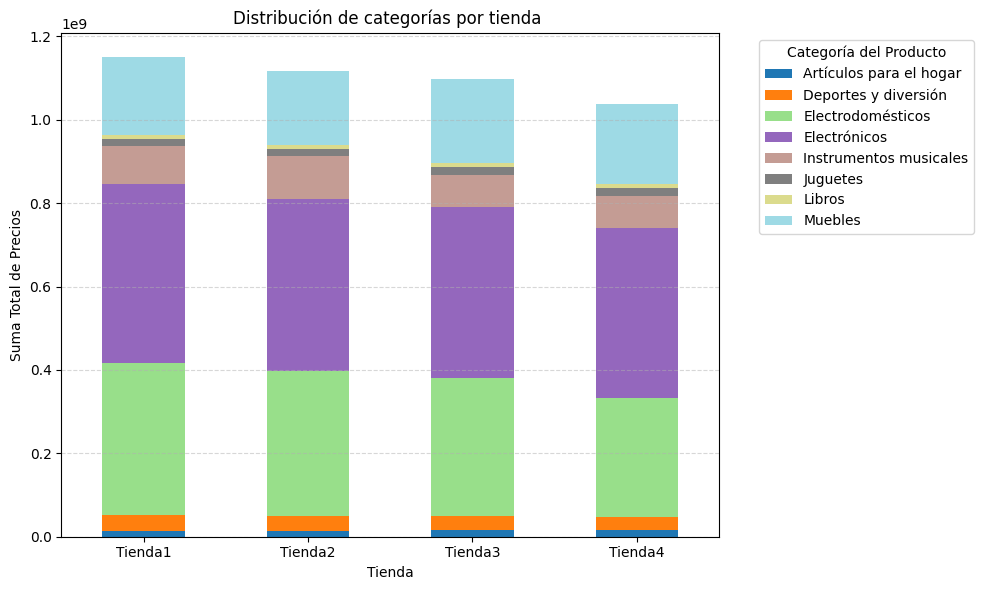

In [11]:
import matplotlib.pyplot as plt

# Reorganizar el DataFrame: index = tienda, columnas = categoría
df_stacked = df_categorias.set_index('Categoría del Producto').T

# Opcional: renombrar índices para que se vean mejor en el gráfico
df_stacked.index = [nombre.replace("Suma_", "") for nombre in df_stacked.index]

# Crear gráfico
df_stacked.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Distribución de categorías por tienda ')
plt.xlabel('Tienda')
plt.ylabel('Suma Total de Precios')
plt.xticks(rotation=0)
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 3. Calificación promedio de la tienda


Calculamos la calificación promedio de cada tienda

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


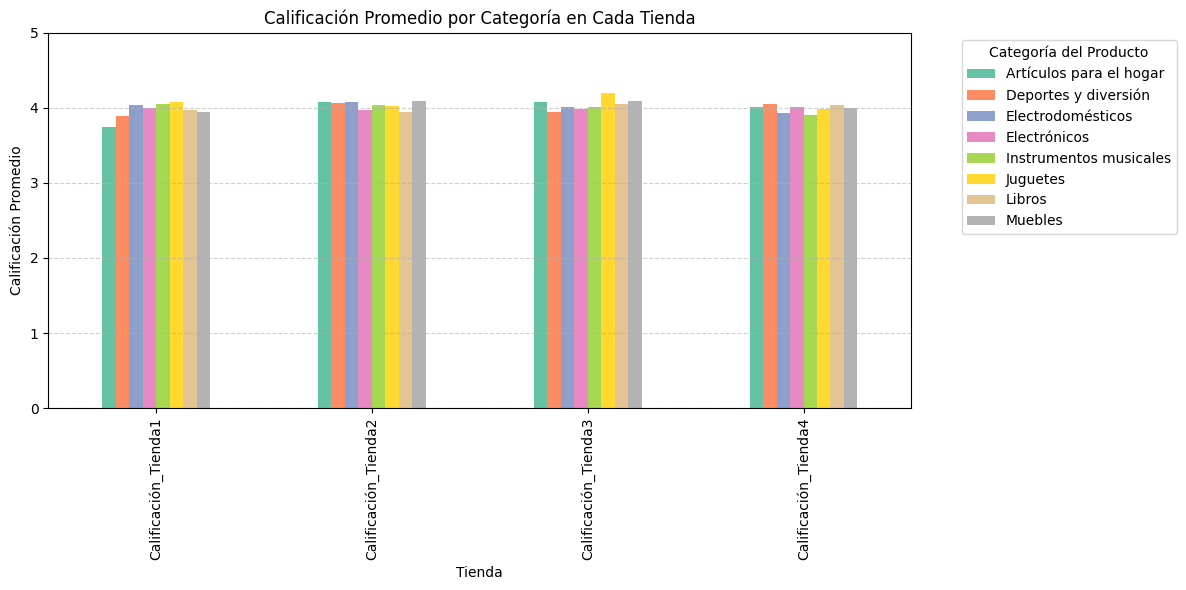

In [12]:
# Suponiendo que la columna se llama "Calificación"
promedio_t1 = tienda1['Calificación'].mean()
promedio_t2 = tienda2['Calificación'].mean()
promedio_t3 = tienda3['Calificación'].mean()
promedio_t4 = tienda4['Calificación'].mean()

# Mostrar resultados
print(f"Calificación promedio Tienda 1: {promedio_t1:.2f}")
print(f"Calificación promedio Tienda 2: {promedio_t2:.2f}")
print(f"Calificación promedio Tienda 3: {promedio_t3:.2f}")
print(f"Calificación promedio Tienda 4: {promedio_t4:.2f}")

def promedio_calificacion_por_categoria(tienda, nombre_tienda):
    df = tienda.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
    df.columns = ['Categoría del Producto', f'Calificación_{nombre_tienda}']
    return df

cat_c1 = promedio_calificacion_por_categoria(tienda1, 'Tienda1')
cat_c2 = promedio_calificacion_por_categoria(tienda2, 'Tienda2')
cat_c3 = promedio_calificacion_por_categoria(tienda3, 'Tienda3')
cat_c4 = promedio_calificacion_por_categoria(tienda4, 'Tienda4')

df_calif = cat_c1.merge(cat_c2, on='Categoría del Producto', how='outer') \
                 .merge(cat_c3, on='Categoría del Producto', how='outer') \
                 .merge(cat_c4, on='Categoría del Producto', how='outer')

df_calif.fillna(0, inplace=True)

import matplotlib.pyplot as plt

df_plot = df_calif.set_index('Categoría del Producto')

df_plot.T.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('Calificación Promedio por Categoría en Cada Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)  # Si la calificación va de 0 a 5
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Cantidad de productos vendidos en la tienda 1

In [25]:
tienda1.columns = tienda1.columns.str.strip().str.lower().str.replace(' ', '_')

productos_t1 = tienda1.groupby('categoría_del_producto')['cantidad_de_cuotas'].sum().sort_values(ascending=False)
print("Tienda 1 - Cantidad total de productos vendidos por categoría:")
print(productos_t1)


Tienda 1 - Cantidad total de productos vendidos por categoría:
categoría_del_producto
Muebles                    1446
Electrónicos               1341
Electrodomésticos           906
Juguetes                    872
Deportes y diversión        796
Instrumentos musicales      573
Libros                      520
Artículos para el hogar     489
Name: cantidad_de_cuotas, dtype: int64


Cantidad de productos vendidos en la tienda 2


In [26]:
tienda2.columns = tienda2.columns.str.strip().str.lower().str.replace(' ', '_')

productos_t2 = tienda2.groupby('categoría_del_producto')['cantidad_de_cuotas'].sum().sort_values(ascending=False)
print("\nTienda 2 - Cantidad total de productos vendidos por categoría:")
print(productos_t2)



Tienda 2 - Cantidad total de productos vendidos por categoría:
categoría_del_producto
Electrónicos               1333
Muebles                    1265
Electrodomésticos           890
Juguetes                    876
Deportes y diversión        720
Instrumentos musicales      659
Libros                      611
Artículos para el hogar     493
Name: cantidad_de_cuotas, dtype: int64


Cantidad de productos vendidos en la tienda 3

In [27]:
tienda3.columns = tienda3.columns.str.strip().str.lower().str.replace(' ', '_')

productos_t3 = tienda3.groupby('categoría_del_producto')['cantidad_de_cuotas'].sum().sort_values(ascending=False)
print("\nTienda 3 - Cantidad total de productos vendidos por categoría:")
print(productos_t3)



Tienda 3 - Cantidad total de productos vendidos por categoría:
categoría_del_producto
Muebles                    1408
Electrónicos               1262
Juguetes                    937
Electrodomésticos           882
Deportes y diversión        873
Instrumentos musicales      580
Artículos para el hogar     542
Libros                      517
Name: cantidad_de_cuotas, dtype: int64


Cantidad de productos vendidos en la tienda 4

In [28]:
tienda4.columns = tienda4.columns.str.strip().str.lower().str.replace(' ', '_')

productos_t4 = tienda4.groupby('categoría_del_producto')['cantidad_de_cuotas'].sum().sort_values(ascending=False)
print("\nTienda 4 - Cantidad total de productos vendidos por categoría:")
print(productos_t4)





Tienda 4 - Cantidad total de productos vendidos por categoría:
categoría_del_producto
Muebles                    1392
Electrónicos               1293
Juguetes                    921
Deportes y diversión        786
Electrodomésticos           756
Libros                      591
Artículos para el hogar     590
Instrumentos musicales      500
Name: cantidad_de_cuotas, dtype: int64


Contamos la cantidad de ventas por producto en cada tienda y creamos un gráfico para ver: los productos más vendidos y los menos vendidos.

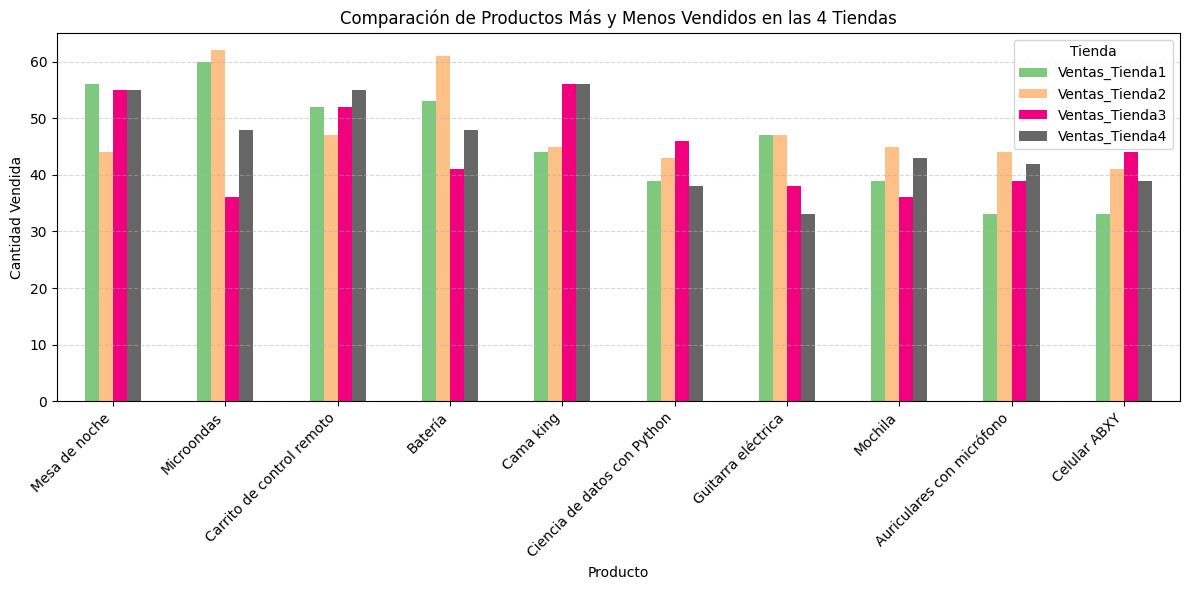

In [13]:
# Contar cantidad de veces que aparece cada producto en cada tienda
ventas1 = tienda1['Producto'].value_counts().reset_index()
ventas1.columns = ['Producto', 'Ventas_Tienda1']

ventas2 = tienda2['Producto'].value_counts().reset_index()
ventas2.columns = ['Producto', 'Ventas_Tienda2']

ventas3 = tienda3['Producto'].value_counts().reset_index()
ventas3.columns = ['Producto', 'Ventas_Tienda3']

ventas4 = tienda4['Producto'].value_counts().reset_index()
ventas4.columns = ['Producto', 'Ventas_Tienda4']

# Unir todos los conteos en un solo DataFrame
df_ventas = ventas1.merge(ventas2, on='Producto', how='outer') \
                   .merge(ventas3, on='Producto', how='outer') \
                   .merge(ventas4, on='Producto', how='outer')

# Reemplazar NaN por 0 (productos no vendidos en alguna tienda)
df_ventas.fillna(0, inplace=True)

# Sumar total de ventas por producto (en todas las tiendas)
df_ventas['Total_Ventas'] = df_ventas[
    ['Ventas_Tienda1', 'Ventas_Tienda2', 'Ventas_Tienda3', 'Ventas_Tienda4']
].sum(axis=1)

# Ordenar por total de ventas
df_ventas_ordenado = df_ventas.sort_values('Total_Ventas', ascending=False)

# Tomar los 5 más y 5 menos vendidos
top5 = df_ventas_ordenado.head(5)
bottom5 = df_ventas_ordenado.tail(5)

# Combinar ambos para graficar
productos_clave = pd.concat([top5, bottom5])


import matplotlib.pyplot as plt

# Reindexar con nombre de producto
df_plot = productos_clave.set_index('Producto')[[
    'Ventas_Tienda1', 'Ventas_Tienda2', 'Ventas_Tienda3', 'Ventas_Tienda4'
]]

# Graficar
df_plot.plot(kind='bar', figsize=(12, 6), colormap='Accent')

plt.title('Comparación de Productos Más y Menos Vendidos en las 4 Tiendas')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

Determinamos primero cuáles son los artículos vendidos por las cuatro tiendas:


In [41]:
# Añadir columna de tienda para cada uno antes de unir
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames
tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Limpiar nombres de columnas
tiendas.columns = tiendas.columns.str.strip()

# Agrupar productos únicos por categoría combinando todas las tiendas
productos_por_categoria = tiendas.groupby('Categoría del Producto')['Producto'].unique()

# Mostrar
for categoria, productos in productos_por_categoria.items():
    print(f"\nCategoría: {categoria}")
    for producto in sorted(productos):
        print(f"   - {producto}")



Categoría: Artículos para el hogar
   - Cubertería
   - Olla de presión
   - Set de ollas
   - Set de vasos

Categoría: Deportes y diversión
   - Balón de baloncesto
   - Balón de voleibol
   - Bicicleta
   - Cuerda para saltar
   - Mochila
   - Vaso térmico

Categoría: Electrodomésticos
   - Estufa
   - Lavadora de ropa
   - Lavavajillas
   - Microondas
   - Refrigerador
   - Secadora de ropa

Categoría: Electrónicos
   - Asistente virtual
   - Auriculares
   - Auriculares con micrófono
   - Celular ABXY
   - Impresora
   - Iphone 15
   - Smart TV
   - Smartwatch
   - TV LED UHD 4K
   - Tablet ABXY

Categoría: Instrumentos musicales
   - Batería
   - Guitarra acústica
   - Guitarra eléctrica
   - Pandereta

Categoría: Juguetes
   - Ajedrez de madera
   - Bloques de construcción
   - Carrito de control remoto
   - Cubo mágico 8x8
   - Dinosaurio Rex
   - Juego de mesa
   - Muñeca bebé

Categoría: Libros
   - Ciencia de datos con Python
   - Dashboards con Power BI
   - Iniciando en pr

Calculando cuánto se gastó pro categoría para cada una de las cuatro tiendas

In [42]:
# Asegurar nombres de columnas sin espacios
for df in [tienda1, tienda2, tienda3, tienda4]:
    df.columns = df.columns.str.strip()

# Función para calcular y mostrar gasto total por categoría para una tienda
def gasto_por_categoria(tienda_df, nombre_tienda):
    gasto = tienda_df.groupby('Categoría del Producto')['Precio'].sum().reset_index()
    gasto = gasto.sort_values(by='Precio', ascending=False)
    gasto.columns = ['Categoría del Producto', f'Gasto Total ({nombre_tienda})']
    return gasto

# Calcular gasto por categoría para cada tienda
gasto_t1 = gasto_por_categoria(tienda1, 'Tienda 1')
gasto_t2 = gasto_por_categoria(tienda2, 'Tienda 2')
gasto_t3 = gasto_por_categoria(tienda3, 'Tienda 3')
gasto_t4 = gasto_por_categoria(tienda4, 'Tienda 4')

# Mostrar los resultados
print("=== Gasto por categoría - Tienda 1 ===")
print(gasto_t1)

print("\n=== Gasto por categoría - Tienda 2 ===")
print(gasto_t2)

print("\n=== Gasto por categoría - Tienda 3 ===")
print(gasto_t3)

print("\n=== Gasto por categoría - Tienda 4 ===")
print(gasto_t4)


=== Gasto por categoría - Tienda 1 ===
    Categoría del Producto  Gasto Total (Tienda 1)
3             Electrónicos             429493500.0
2        Electrodomésticos             363685200.0
7                  Muebles             187633700.0
4   Instrumentos musicales              91299000.0
1     Deportes y diversión              39290000.0
5                 Juguetes              17995700.0
0  Artículos para el hogar              12698400.0
6                   Libros               8784900.0

=== Gasto por categoría - Tienda 2 ===
    Categoría del Producto  Gasto Total (Tienda 2)
3             Electrónicos             410831100.0
2        Electrodomésticos             348567800.0
7                  Muebles             176426300.0
4   Instrumentos musicales             104990300.0
1     Deportes y diversión              34744500.0
5                 Juguetes              15945400.0
0  Artículos para el hogar              14746900.0
6                   Libros              10091200.0

==

Calculando cuánto se pagó en gastos de envío


In [47]:
# Asegurar nombres de columnas sin espacios
for df in [tienda1, tienda2, tienda3, tienda4]:
    df.columns = df.columns.str.strip()

# Función para calcular y mostrar gasto total de envío por categoría
def gasto_envio_por_categoria(tienda_df, nombre_tienda):
    gasto_envio = tienda_df.groupby('Categoría del Producto')['Costo de envío'].sum().reset_index()
    gasto_envio = gasto_envio.sort_values(by='Costo de envío', ascending=False)
    gasto_envio.columns = ['Categoría del Producto', f'Costo de envío Total ({nombre_tienda})']
    return gasto_envio

# Calcular gasto de envío por categoría para cada tienda
envio_t1 = gasto_envio_por_categoria(tienda1, 'Tienda 1')
envio_t2 = gasto_envio_por_categoria(tienda2, 'Tienda 2')
envio_t3 = gasto_envio_por_categoria(tienda3, 'Tienda 3')
envio_t4 = gasto_envio_por_categoria(tienda4, 'Tienda 4')

# Mostrar los resultados
print("=== Gastos de Envío por categoría - Tienda 1 ===")
print(envio_t1)

print("\n=== Gastos de Envío por categoría - Tienda 2 ===")
print(envio_t2)

print("\n=== Gastos de Envío por categoría - Tienda 3 ===")
print(envio_t3)

print("\n=== Gastos de Envío por categoría - Tienda 4 ===")
print(envio_t4)


=== Gastos de Envío por categoría - Tienda 1 ===
    Categoría del Producto  Costo de envío Total (Tienda 1)
3             Electrónicos                       22963700.0
2        Electrodomésticos                       19324000.0
7                  Muebles                        9994900.0
4   Instrumentos musicales                        4883900.0
1     Deportes y diversión                        2121100.0
5                 Juguetes                         979500.0
0  Artículos para el hogar                         643800.0
6                   Libros                         467000.0

=== Gastos de Envío por categoría - Tienda 2 ===
    Categoría del Producto  Costo de envío Total (Tienda 2)
3             Electrónicos                       21814200.0
2        Electrodomésticos                       18555600.0
7                  Muebles                        9436100.0
4   Instrumentos musicales                        5557700.0
1     Deportes y diversión                        1877300.0
5

Calculando cuánto representan los gastos de envío como porcentaje del total del costo del producto. El cálculo lo realizamos de la siguiente manera:

$\text{Porcentaje de envío}=\frac{\text{Costo total de envío}}{\text{Total precio}}*100$


In [48]:
# Asegurar nombres de columnas sin espacios
for df in [tienda1, tienda2, tienda3, tienda4]:
    df.columns = df.columns.str.strip()

# Función para calcular porcentaje de gasto de envío por categoría
def porcentaje_envio_por_categoria(tienda_df, nombre_tienda):
    # Agrupar y sumar por categoría
    resumen = tienda_df.groupby('Categoría del Producto')[['Precio', 'Costo de envío']].sum().reset_index()

    # Calcular porcentaje
    resumen[f'% Envío vs Producto ({nombre_tienda})'] = (resumen['Costo de envío'] / resumen['Precio']) * 100

    # Seleccionar columnas relevantes
    resumen = resumen[['Categoría del Producto', f'% Envío vs Producto ({nombre_tienda})']]

    # Redondear a 2 decimales
    resumen[f'% Envío vs Producto ({nombre_tienda})'] = resumen[f'% Envío vs Producto ({nombre_tienda})'].round(2)

    return resumen

# Calcular porcentaje por tienda
porc_envio_t1 = porcentaje_envio_por_categoria(tienda1, 'Tienda 1')
porc_envio_t2 = porcentaje_envio_por_categoria(tienda2, 'Tienda 2')
porc_envio_t3 = porcentaje_envio_por_categoria(tienda3, 'Tienda 3')
porc_envio_t4 = porcentaje_envio_por_categoria(tienda4, 'Tienda 4')

# Mostrar resultados
print("=== % Gasto de Envío vs Precio del Producto - Tienda 1 ===")
print(porc_envio_t1)

print("\n=== % Gasto de Envío vs Precio del Producto - Tienda 2 ===")
print(porc_envio_t2)

print("\n=== % Gasto de Envío vs Precio del Producto - Tienda 3 ===")
print(porc_envio_t3)

print("\n=== % Gasto de Envío vs Precio del Producto - Tienda 4 ===")
print(porc_envio_t4)


=== % Gasto de Envío vs Precio del Producto - Tienda 1 ===
    Categoría del Producto  % Envío vs Producto (Tienda 1)
0  Artículos para el hogar                            5.07
1     Deportes y diversión                            5.40
2        Electrodomésticos                            5.31
3             Electrónicos                            5.35
4   Instrumentos musicales                            5.35
5                 Juguetes                            5.44
6                   Libros                            5.32
7                  Muebles                            5.33

=== % Gasto de Envío vs Precio del Producto - Tienda 2 ===
    Categoría del Producto  % Envío vs Producto (Tienda 2)
0  Artículos para el hogar                            5.43
1     Deportes y diversión                            5.40
2        Electrodomésticos                            5.32
3             Electrónicos                            5.31
4   Instrumentos musicales                            5

Determinando cuál categoría es más rentable

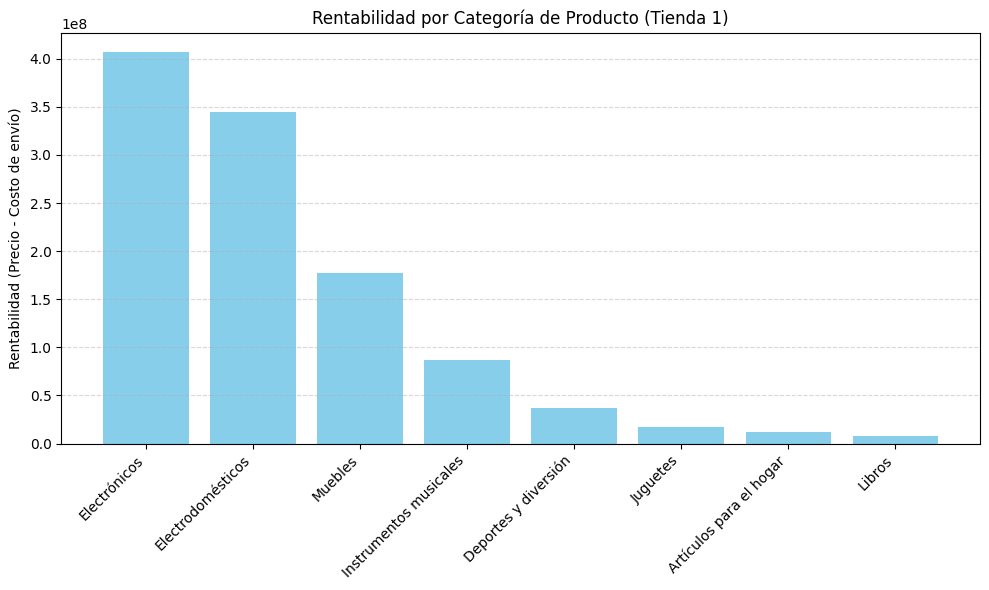

In [49]:
import matplotlib.pyplot as plt

# Asegurar nombres de columnas sin espacios
tienda1.columns = tienda1.columns.str.strip()

# Calcular ingresos y costos por categoría
rentabilidad = tienda1.groupby('Categoría del Producto')[['Precio', 'Costo de envío']].sum().reset_index()

# Calcular rentabilidad
rentabilidad['Rentabilidad'] = rentabilidad['Precio'] - rentabilidad['Costo de envío']

# Ordenar por rentabilidad descendente
rentabilidad = rentabilidad.sort_values(by='Rentabilidad', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(rentabilidad['Categoría del Producto'], rentabilidad['Rentabilidad'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rentabilidad (Precio - Costo de envío)')
plt.title('Rentabilidad por Categoría de Producto (Tienda 1)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


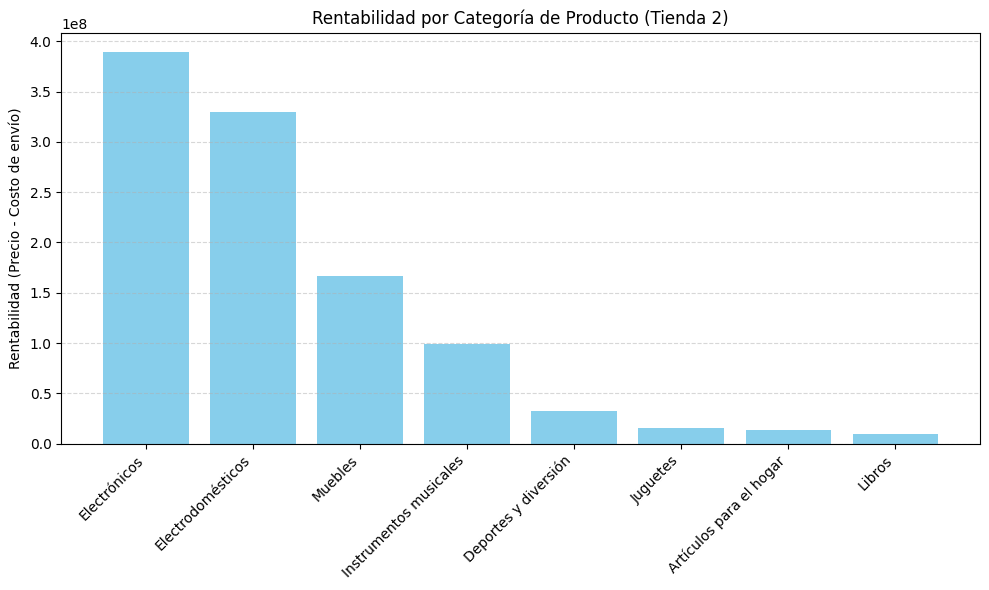

In [52]:
import matplotlib.pyplot as plt

# Asegurar nombres de columnas sin espacios
tienda2.columns = tienda2.columns.str.strip()

# Calcular ingresos y costos por categoría
rentabilidad = tienda2.groupby('Categoría del Producto')[['Precio', 'Costo de envío']].sum().reset_index()

# Calcular rentabilidad
rentabilidad['Rentabilidad'] = rentabilidad['Precio'] - rentabilidad['Costo de envío']

# Ordenar por rentabilidad descendente
rentabilidad = rentabilidad.sort_values(by='Rentabilidad', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(rentabilidad['Categoría del Producto'], rentabilidad['Rentabilidad'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rentabilidad (Precio - Costo de envío)')
plt.title('Rentabilidad por Categoría de Producto (Tienda 2)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

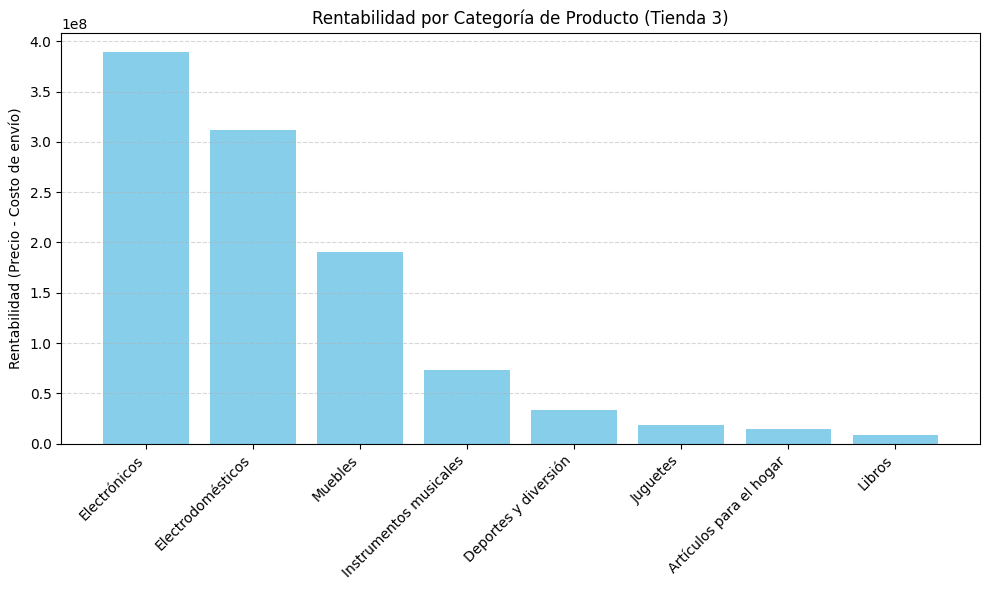

In [51]:
import matplotlib.pyplot as plt

# Asegurar nombres de columnas sin espacios
tienda3.columns = tienda3.columns.str.strip()

# Calcular ingresos y costos por categoría
rentabilidad = tienda3.groupby('Categoría del Producto')[['Precio', 'Costo de envío']].sum().reset_index()

# Calcular rentabilidad
rentabilidad['Rentabilidad'] = rentabilidad['Precio'] - rentabilidad['Costo de envío']

# Ordenar por rentabilidad descendente
rentabilidad = rentabilidad.sort_values(by='Rentabilidad', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(rentabilidad['Categoría del Producto'], rentabilidad['Rentabilidad'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rentabilidad (Precio - Costo de envío)')
plt.title('Rentabilidad por Categoría de Producto (Tienda 3)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

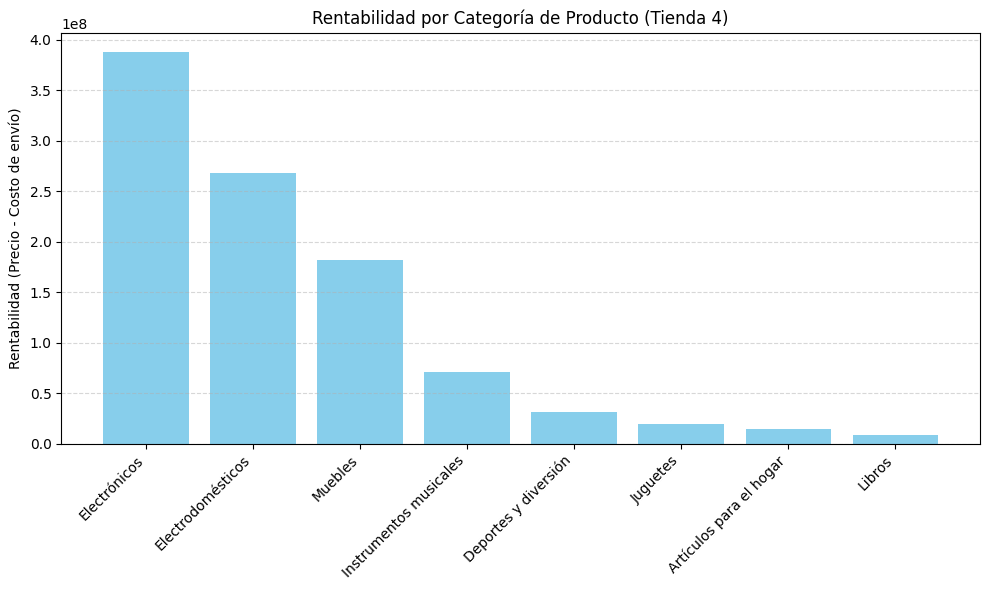

In [53]:
import matplotlib.pyplot as plt

# Asegurar nombres de columnas sin espacios
tienda4.columns = tienda4.columns.str.strip()

# Calcular ingresos y costos por categoría
rentabilidad = tienda4.groupby('Categoría del Producto')[['Precio', 'Costo de envío']].sum().reset_index()

# Calcular rentabilidad
rentabilidad['Rentabilidad'] = rentabilidad['Precio'] - rentabilidad['Costo de envío']

# Ordenar por rentabilidad descendente
rentabilidad = rentabilidad.sort_values(by='Rentabilidad', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(rentabilidad['Categoría del Producto'], rentabilidad['Rentabilidad'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rentabilidad (Precio - Costo de envío)')
plt.title('Rentabilidad por Categoría de Producto (Tienda 4)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##ANALISIS


Gráfico de rentabilidad de las 4 tiendas por categoría

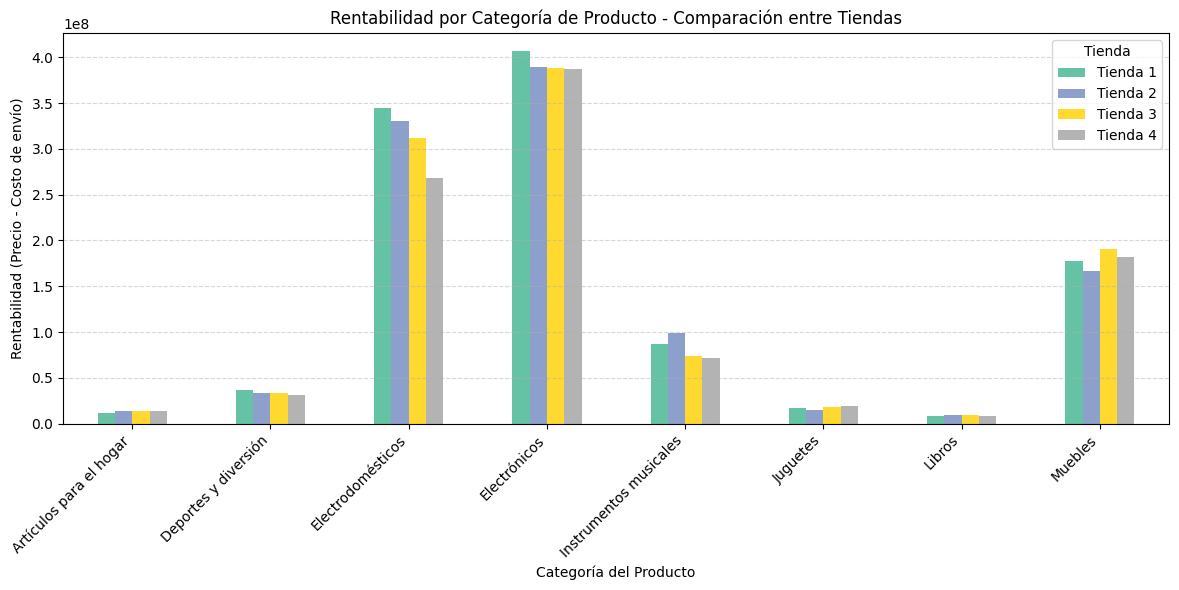

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Aseguramos que los nombres de las columnas estén limpios
for df in [tienda1, tienda2, tienda3, tienda4]:
    df.columns = df.columns.str.strip()

# Función para calcular rentabilidad por categoría
def calcular_rentabilidad(df, nombre_tienda):
    resumen = df.groupby('Categoría del Producto')[['Precio', 'Costo de envío']].sum()
    resumen['Rentabilidad'] = resumen['Precio'] - resumen['Costo de envío']
    resumen = resumen[['Rentabilidad']].rename(columns={'Rentabilidad': nombre_tienda})
    return resumen

# Calcular rentabilidad por tienda
r1 = calcular_rentabilidad(tienda1, 'Tienda 1')
r2 = calcular_rentabilidad(tienda2, 'Tienda 2')
r3 = calcular_rentabilidad(tienda3, 'Tienda 3')
r4 = calcular_rentabilidad(tienda4, 'Tienda 4')

# Unir los resultados en un solo DataFrame
rentabilidades = r1.join([r2, r3, r4], how='outer').fillna(0)

# Ordenar categorías para visualización
rentabilidades = rentabilidades.sort_index()

# Crear gráfico de barras agrupadas
rentabilidades.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title('Rentabilidad por Categoría de Producto - Comparación entre Tiendas')
plt.ylabel('Rentabilidad (Precio - Costo de envío)')
plt.xlabel('Categoría del Producto')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


Haciendo un seguimiento en el tiempo


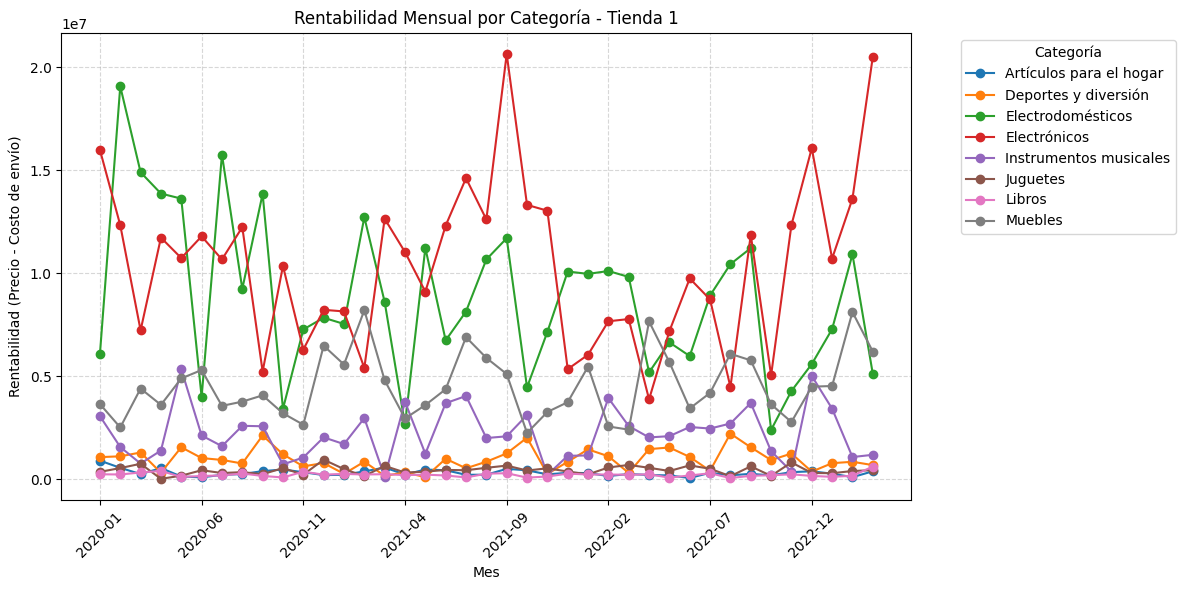

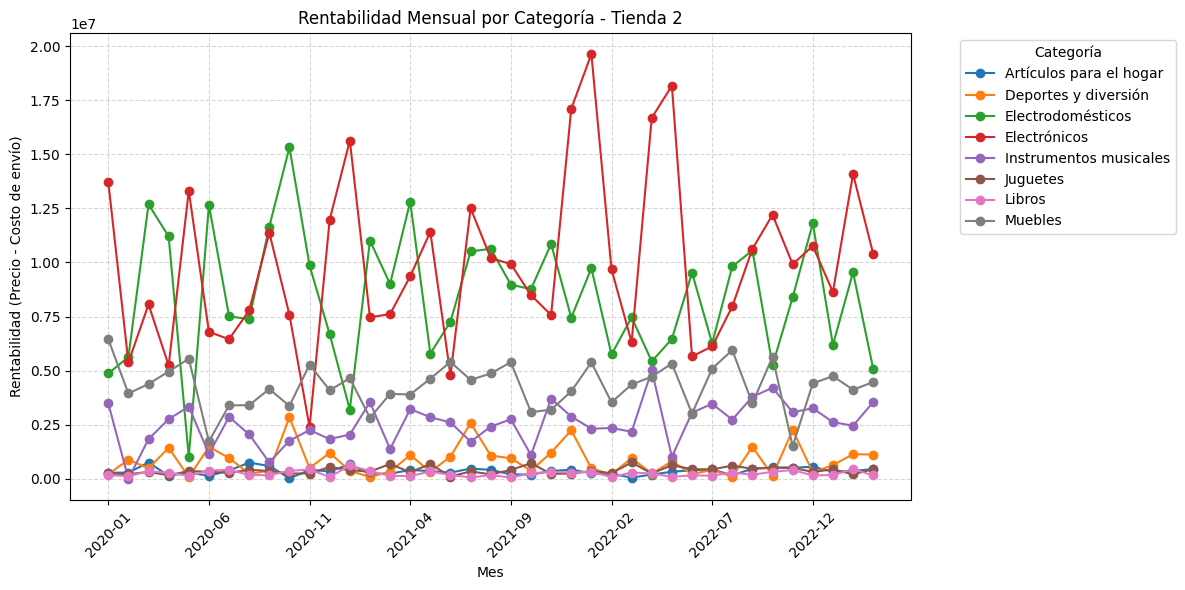

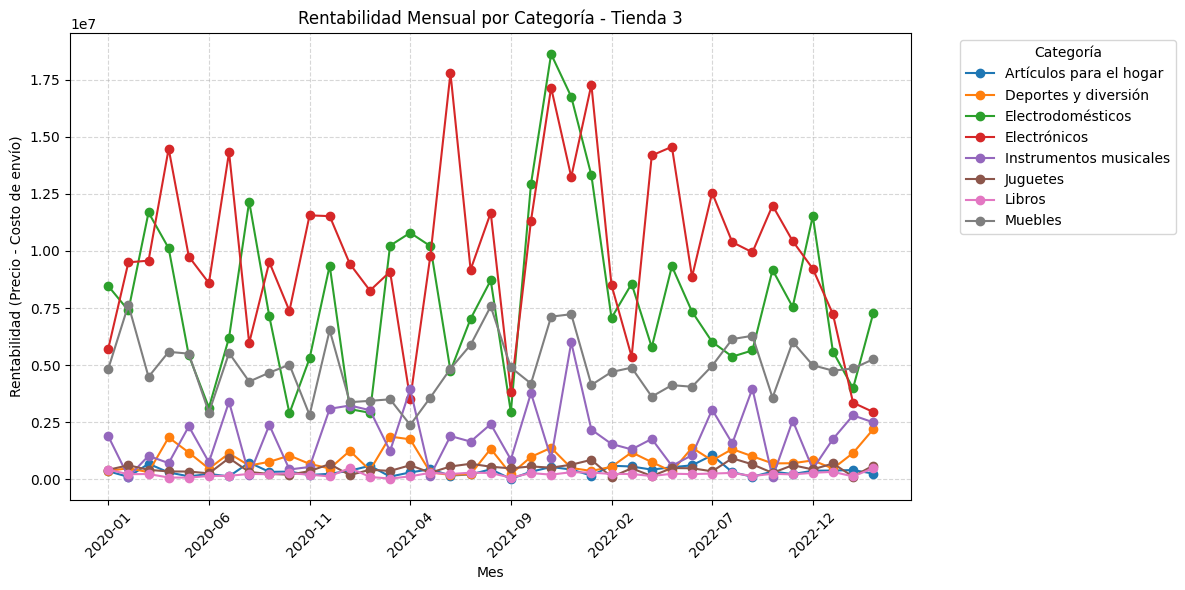

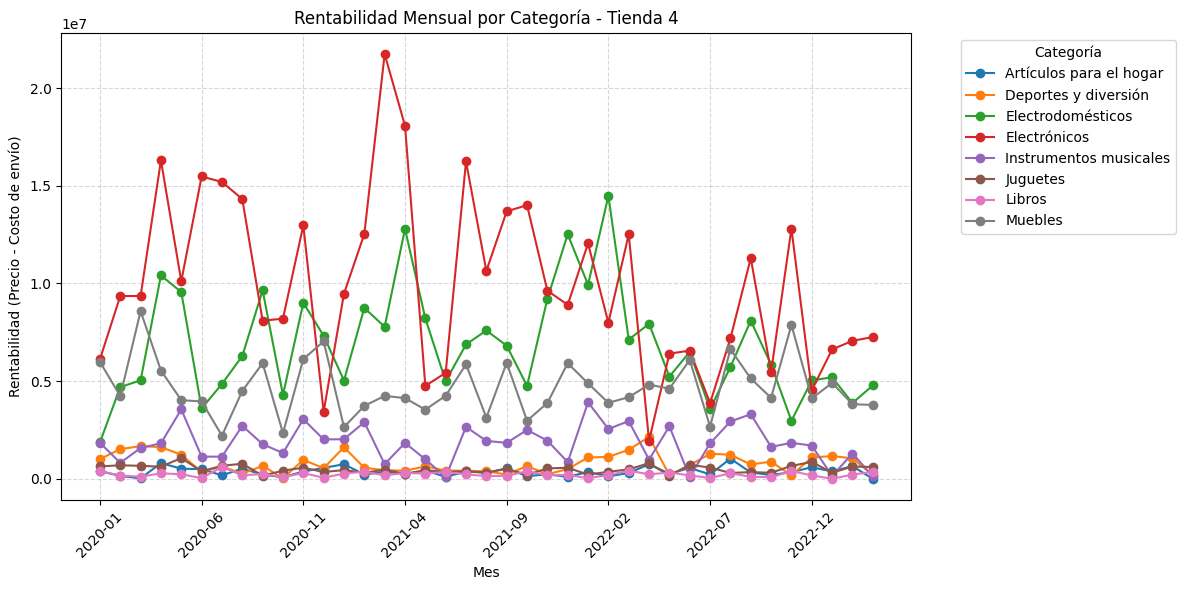

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Aseguramos nombres limpios en columnas
for df in [tienda1, tienda2, tienda3, tienda4]:
    df.columns = df.columns.str.strip()

# Función para preparar datos y calcular rentabilidad mensual por categoría corrigiendo el formato dd/mm/aaaa
def rentabilidad_mensual_por_categoria(df):
    df = df.copy()
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)
    df['Mes'] = df['Fecha de Compra'].dt.to_period('M').astype(str)
    df['Rentabilidad'] = df['Precio'] - df['Costo de envío']

    resumen = df.groupby(['Mes', 'Categoría del Producto'])['Rentabilidad'].sum().reset_index()
    tabla = resumen.pivot(index='Mes', columns='Categoría del Producto', values='Rentabilidad').fillna(0)
    return tabla


# Obtener rentabilidad mensual para cada tienda
r1_mensual = rentabilidad_mensual_por_categoria(tienda1)
r2_mensual = rentabilidad_mensual_por_categoria(tienda2)
r3_mensual = rentabilidad_mensual_por_categoria(tienda3)
r4_mensual = rentabilidad_mensual_por_categoria(tienda4)

# Graficar rentabilidad por tienda
def graficar_rentabilidad_mensual(tabla, nombre_tienda):
    tabla.plot(kind='line', marker='o', figsize=(12, 6))
    plt.title(f'Rentabilidad Mensual por Categoría - {nombre_tienda}')
    plt.ylabel('Rentabilidad (Precio - Costo de envío)')
    plt.xlabel('Mes')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Gráficos individuales por tienda
graficar_rentabilidad_mensual(r1_mensual, "Tienda 1")
graficar_rentabilidad_mensual(r2_mensual, "Tienda 2")
graficar_rentabilidad_mensual(r3_mensual, "Tienda 3")
graficar_rentabilidad_mensual(r4_mensual, "Tienda 4")


<Figure size 1600x800 with 0 Axes>

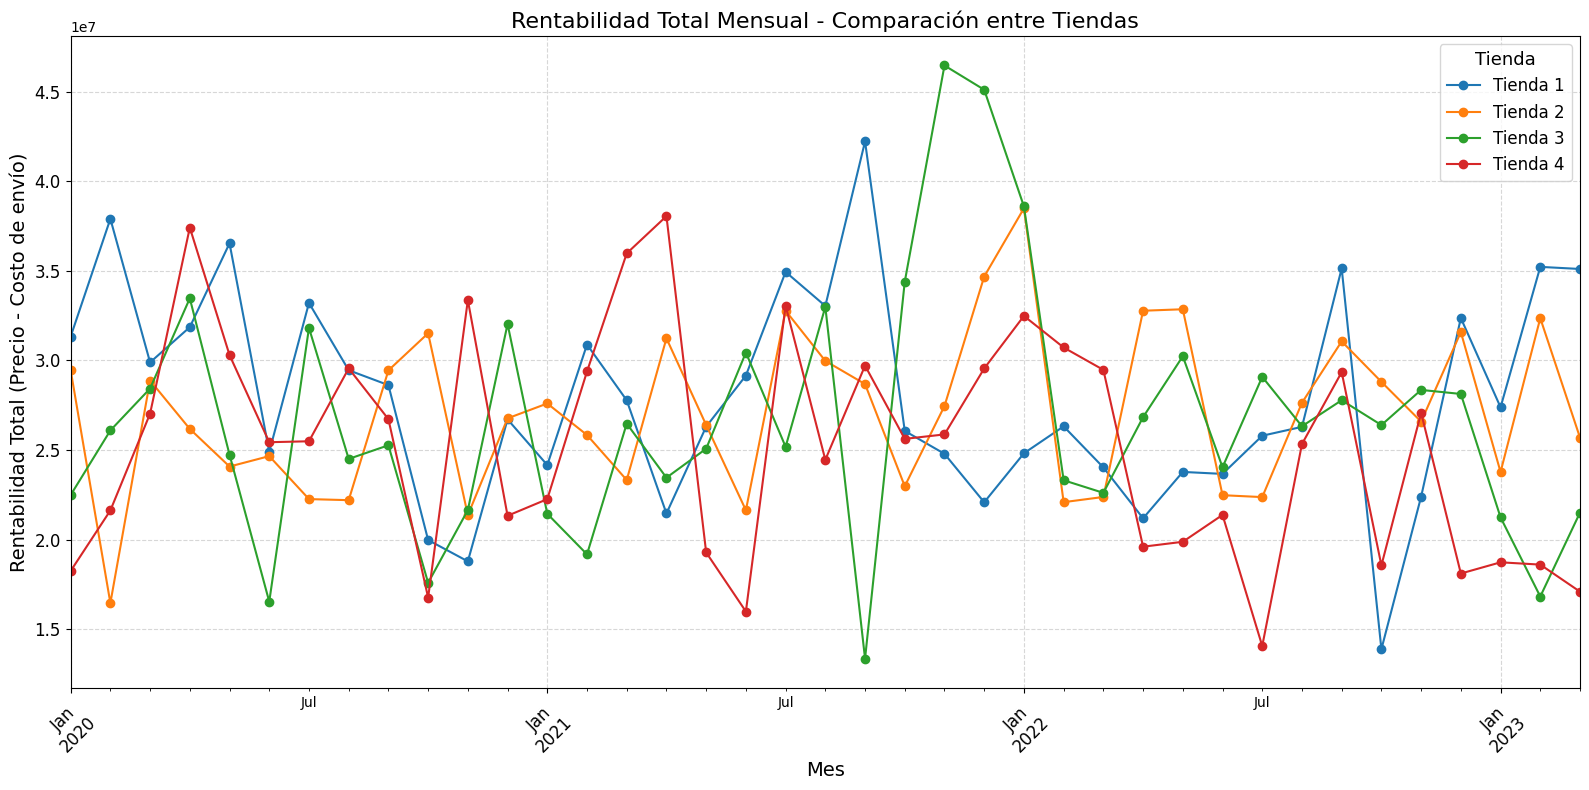

In [62]:
import matplotlib.pyplot as plt

# Función corregida para obtener rentabilidad mensual total por tienda
def rentabilidad_total_mensual(df):
    df = df.copy()
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)
    df['Mes'] = df['Fecha de Compra'].dt.to_period('M').dt.to_timestamp()
    df['Rentabilidad'] = df['Precio'] - df['Costo de envío']
    resumen = df.groupby('Mes')['Rentabilidad'].sum().reset_index()
    return resumen.set_index('Mes')

# Calcular rentabilidad total mensual (corregido)
total_r1 = rentabilidad_total_mensual(tienda1).rename(columns={'Rentabilidad': 'Tienda 1'})
total_r2 = rentabilidad_total_mensual(tienda2).rename(columns={'Rentabilidad': 'Tienda 2'})
total_r3 = rentabilidad_total_mensual(tienda3).rename(columns={'Rentabilidad': 'Tienda 3'})
total_r4 = rentabilidad_total_mensual(tienda4).rename(columns={'Rentabilidad': 'Tienda 4'})

# Unir en un solo DataFrame
comparativo = total_r1.join([total_r2, total_r3, total_r4], how='outer').fillna(0)
comparativo = comparativo.sort_index()  # Orden cronológico

# Crear la figura más grande
plt.figure(figsize=(16, 8))  # Aumentado de (12, 6) a (16, 8)

# Graficar los datos de rentabilidad mensual comparativa
comparativo.plot(marker='o', figsize=(16, 8))

# Configuración del gráfico
plt.title('Rentabilidad Total Mensual - Comparación entre Tiendas', fontsize=16)
plt.ylabel('Rentabilidad Total (Precio - Costo de envío)', fontsize=14)
plt.xlabel('Mes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tienda', fontsize=12, title_fontsize=13)
plt.tight_layout()

# Mostrar el gráfico
plt.show()




Graficando la línea de tendencia


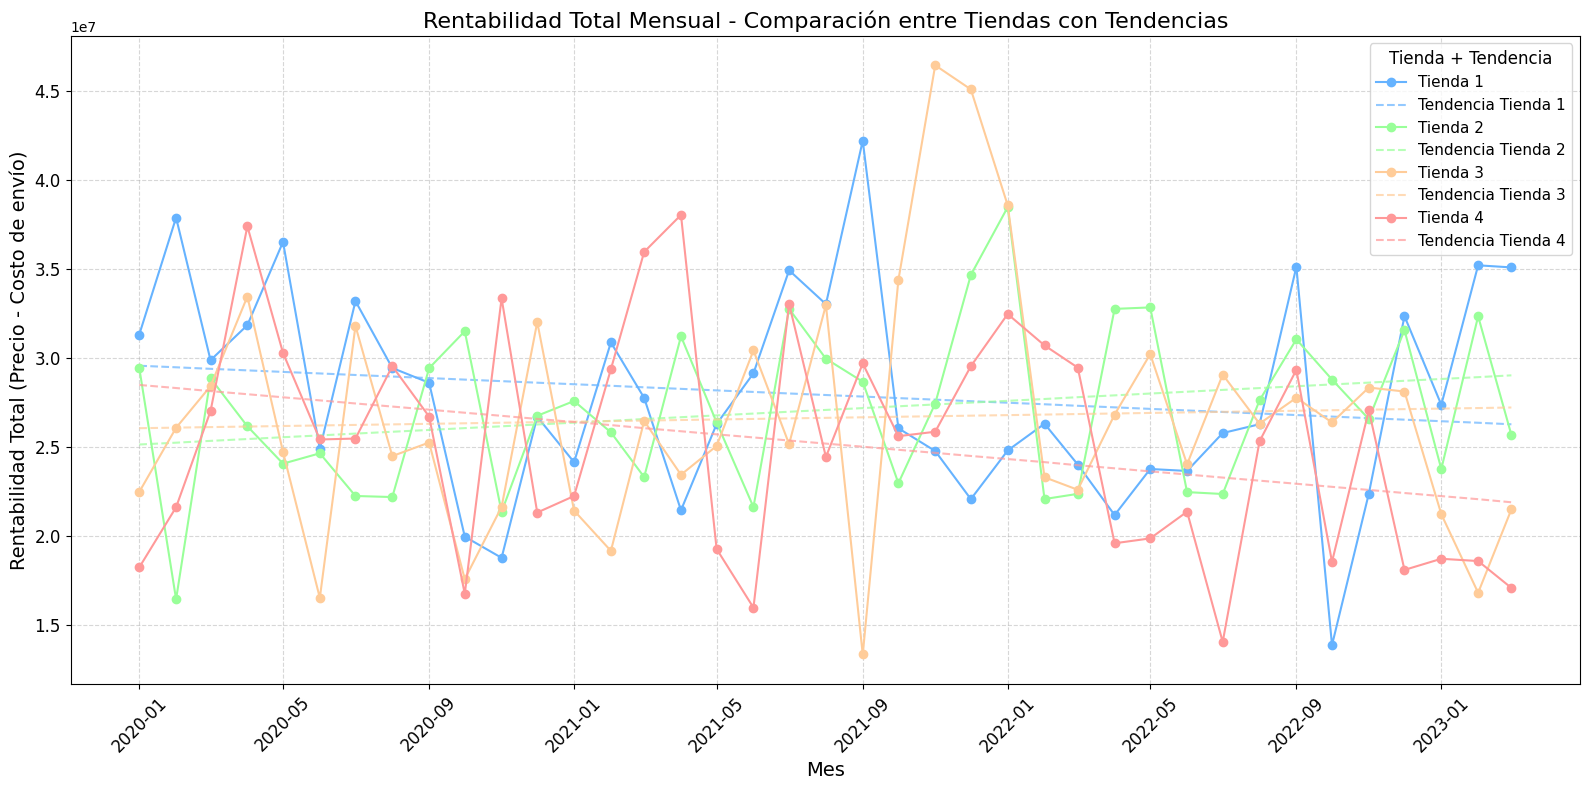

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Crear figura y ejes manualmente
fig, ax = plt.subplots(figsize=(16, 8))

# Convertir índice de fechas a valores numéricos para la regresión
x_numeric = np.arange(len(comparativo))
meses = comparativo.index

# Colores por tienda
colores = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']

# Graficar datos y tendencias
for i, tienda in enumerate(comparativo.columns):
    y = comparativo[tienda].values

    # Graficar los puntos reales
    ax.plot(meses, y, marker='o', label=f'{tienda}', color=colores[i])

    # Calcular línea de tendencia
    coef = np.polyfit(x_numeric, y, 1)
    tendencia = np.poly1d(coef)

    # Graficar línea de tendencia
    ax.plot(meses, tendencia(x_numeric), linestyle='--', label=f'Tendencia {tienda}', color=colores[i], alpha=0.7)

# Configuraciones del gráfico
ax.set_title('Rentabilidad Total Mensual - Comparación entre Tiendas con Tendencias', fontsize=16)
ax.set_ylabel('Rentabilidad Total (Precio - Costo de envío)', fontsize=14)
ax.set_xlabel('Mes', fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(fontsize=11, title='Tienda + Tendencia', title_fontsize=12)
plt.tight_layout()
plt.show()



Es claro que la línea de tendencia de la tienda 4 es la peor de las 4, aunque la tienda 1 también es negativa. Mientras que la tienda 2 es la que mejor viene creciendo.

Ahora procedemos a calcular la rentabilidad total de las 4 tiendas.

1. La participación proporcional de cada tienda en la rentabilidad total combinada.

2. Porcentaje visual para comparar rápidamente cuál tienda aporta más (o menos).

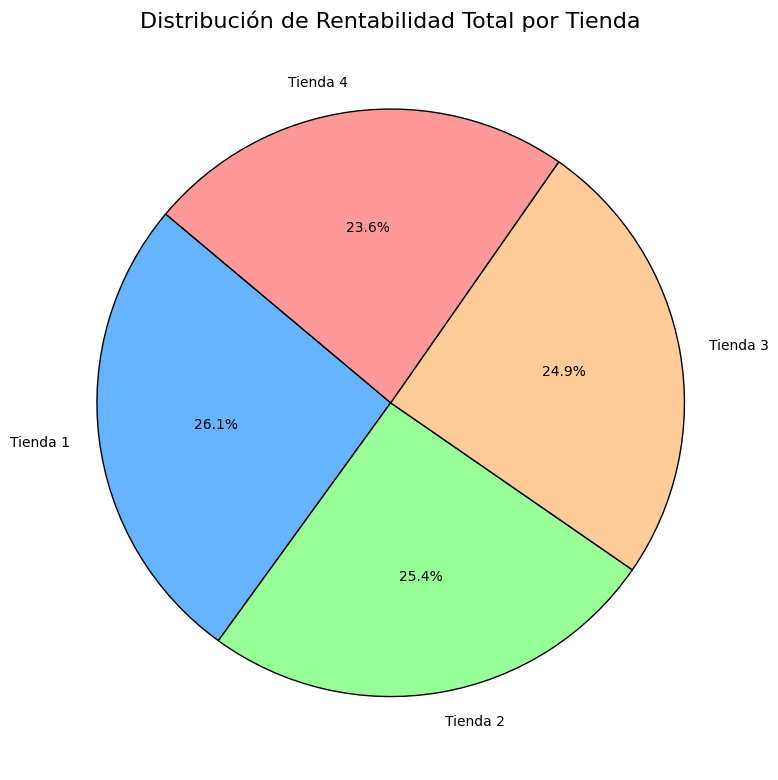

In [63]:
import matplotlib.pyplot as plt

# Calcular rentabilidad total por tienda
total_rentabilidad = {
    'Tienda 1': tienda1['Precio'].sum() - tienda1['Costo de envío'].sum(),
    'Tienda 2': tienda2['Precio'].sum() - tienda2['Costo de envío'].sum(),
    'Tienda 3': tienda3['Precio'].sum() - tienda3['Costo de envío'].sum(),
    'Tienda 4': tienda4['Precio'].sum() - tienda4['Costo de envío'].sum()
}

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    total_rentabilidad.values(),
    labels=total_rentabilidad.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribución de Rentabilidad Total por Tienda', fontsize=16)
plt.tight_layout()
plt.show()


A partir de la gráfica anterior se puede observar que la tienda 4 no solo es la que más está bajando su rentabilidad, sino que también es la que menos aporta al total de ingresos.

Por último vamos a crear un mapa de calor con los envíos de las 4 tiendas

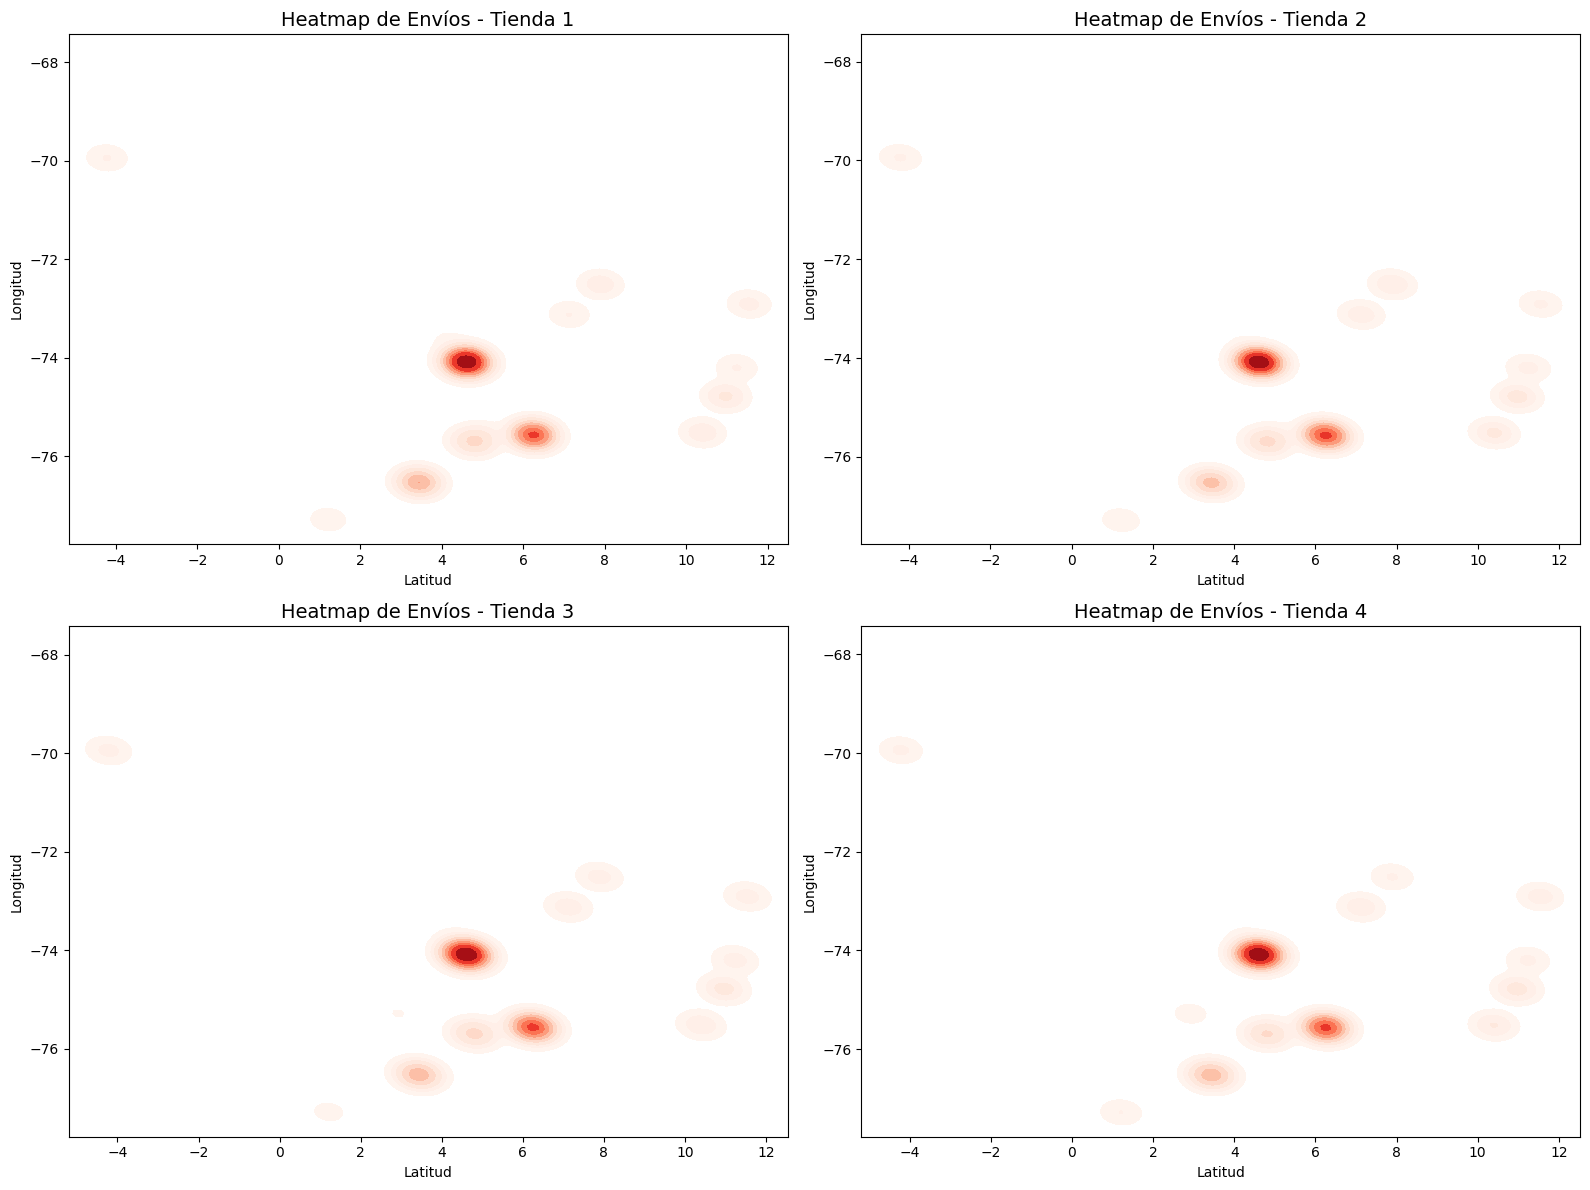

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de datasets
tiendas = [tienda1, tienda2, tienda3, tienda4]
titulos = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Crear una figura con 4 subgráficos (2x2)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, (tienda, titulo) in enumerate(zip(tiendas, titulos)):
    ax = axs[i // 2, i % 2]  # posición en la grilla
    sns.kdeplot(
        data=tienda,
        x='lat',
        y='lon',
        fill=True,
        cmap='Reds',
        bw_adjust=0.5,
        ax=ax,
        thresh=0.05
    )
    ax.set_title(f'Heatmap de Envíos - {titulo}', fontsize=14)
    ax.set_xlabel('Latitud')
    ax.set_ylabel('Longitud')

plt.tight_layout()
plt.show()


Dado que los envíos parecen coincidir en destinos creamos un mapa adicional con los destinos combinados.

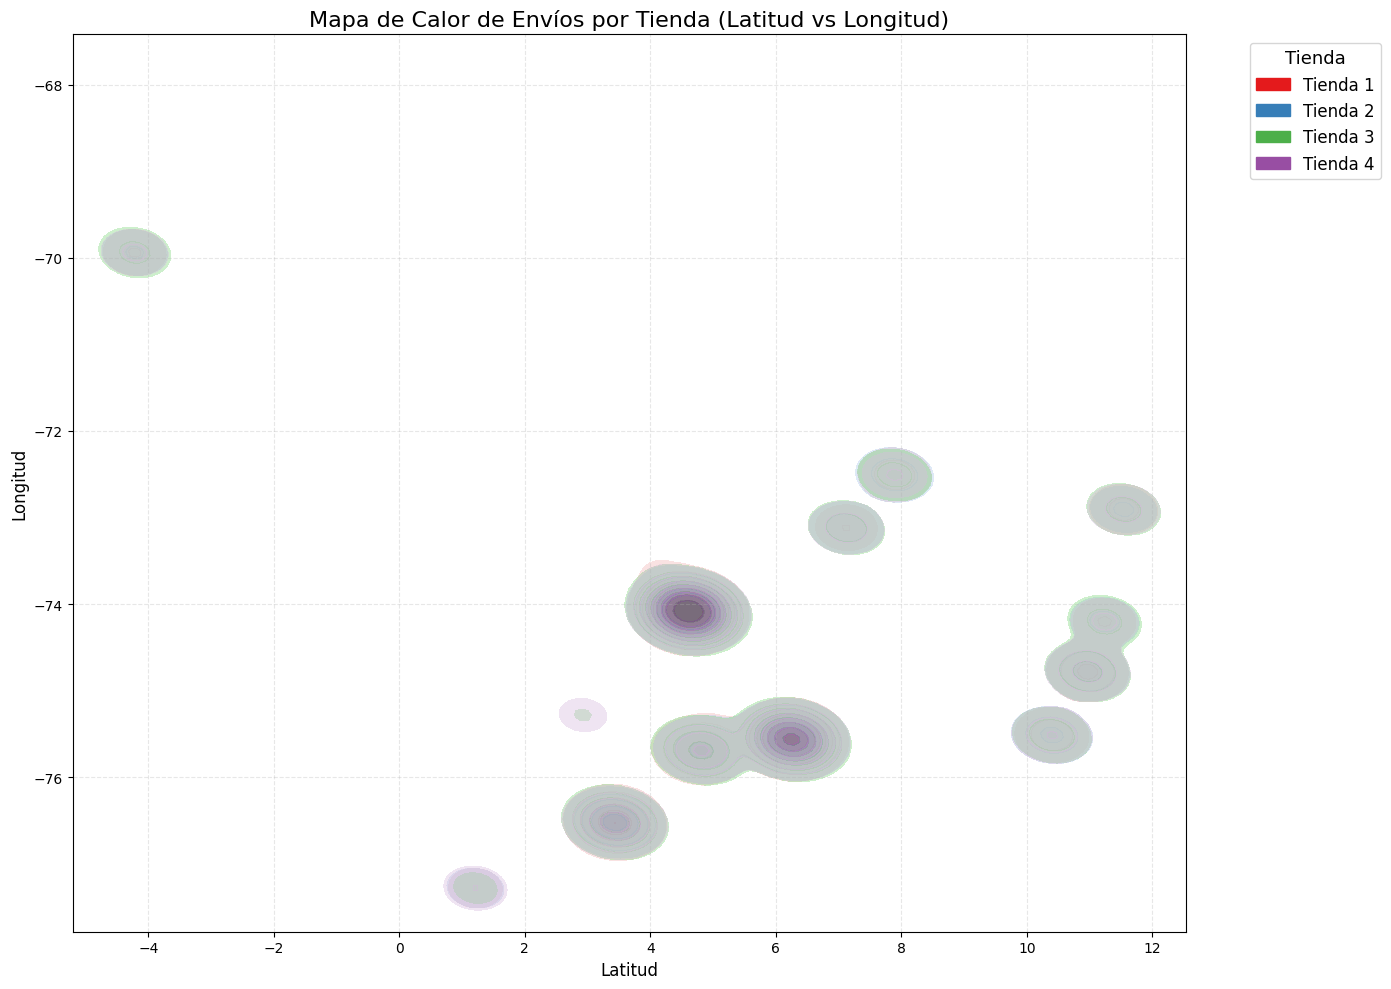

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Asignar etiquetas si no existen
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Lista de tiendas y colores personalizados
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']  # paleta Set1

# Crear figura
plt.figure(figsize=(14, 10))

# Graficar cada tienda por separado con su color
for tienda, nombre, color in zip(tiendas, nombres, colores):
    sns.kdeplot(
        data=tienda,
        x='lat',
        y='lon',
        fill=True,
        color=color,
        alpha=0.4,
        bw_adjust=0.5,
        thresh=0.05
    )

# Crear leyenda personalizada
leyenda_patches = [Patch(color=color, label=nombre) for color, nombre in zip(colores, nombres)]
plt.legend(handles=leyenda_patches, title='Tienda', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)

# Ajustes finales
plt.title('Mapa de Calor de Envíos por Tienda (Latitud vs Longitud)', fontsize=16)
plt.xlabel('Latitud', fontsize=12)
plt.ylabel('Longitud', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



**Vamos a detectar los productos con menor rendimiento:**

Para cada tienda:

1. Calcular las unidades vendidas por producto (volumen de ventas).

2. Calcular la rentabilidad total por producto
Suma del Precio - Costo de envío para cada producto (rentabilidad bruta).

3. Normalizar ambos valores (ventas y rentabilidad)
Para que puedan compararse, llevamos ambos a una escala de 0 a 1 (mín-max).

4. Combinar ambas métricas con un índice compuesto:

$\text{Índice de bajo rendimiento} = 1 - \text{promedio(normalizado_ventas, normalizado_rentabilidad)}$

5. Filtrar los productos con mayor índice de bajo rendimiento. Los valores más cercanos a 1 serán los peores en ambas métricas.

In [82]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def detectar_productos_bajo_rendimiento(tienda_df, nombre_tienda):
    # Calcular rentabilidad
    tienda_df['Rentabilidad'] = tienda_df['Precio'] - tienda_df['Costo de envío']

    # 1. Unidades vendidas por producto
    ventas = tienda_df['Producto'].value_counts().reset_index()
    ventas.columns = ['Producto', 'Unidades Vendidas']

    # 2. Rentabilidad total por producto
    rentabilidad = tienda_df.groupby('Producto')['Rentabilidad'].sum().reset_index()

    # 3. Unir ventas y rentabilidad
    resumen = pd.merge(ventas, rentabilidad, on='Producto')

    # 4. Normalizar
    scaler = MinMaxScaler()
    resumen[['Ventas_Norm', 'Rentabilidad_Norm']] = scaler.fit_transform(
        resumen[['Unidades Vendidas', 'Rentabilidad']]
    )

    # 5. Índice de bajo rendimiento
    resumen['Índice_Bajo_Rendimiento'] = 1 - resumen[['Ventas_Norm', 'Rentabilidad_Norm']].mean(axis=1)

    # 6. Añadir nombre de la tienda
    resumen['Tienda'] = nombre_tienda

    return resumen[['Producto', 'Unidades Vendidas', 'Rentabilidad', 'Índice_Bajo_Rendimiento', 'Tienda']]

# Aplicar a las cuatro tiendas
bajo1 = detectar_productos_bajo_rendimiento(tienda1, "Tienda 1")
bajo2 = detectar_productos_bajo_rendimiento(tienda2, "Tienda 2")
bajo3 = detectar_productos_bajo_rendimiento(tienda3, "Tienda 3")
bajo4 = detectar_productos_bajo_rendimiento(tienda4, "Tienda 4")

# Unir todo en una sola tabla
tabla_combinada = pd.concat([bajo1, bajo2, bajo3, bajo4], ignore_index=True)

# Mostrar los 10 productos con mayor índice de bajo rendimiento por tienda
tabla_combinada_top = (
    tabla_combinada.sort_values(['Tienda', 'Índice_Bajo_Rendimiento'], ascending=[True, False])
    .groupby('Tienda')
    .head(10)
    .reset_index(drop=True)
)

tabla_combinada_top


,Producto,Unidades Vendidas,Rentabilidad,Índice_Bajo_Rendimiento,Tienda
0,Auriculares con micrófono,33,4459500.0,0.985487,Tienda 1
1,Olla de presión,35,2495600.0,0.955778,Tienda 1
2,Pandereta,36,2114500.0,0.938682,Tienda 1
3,Celular ABXY,33,30903500.0,0.886807,Tienda 1
4,Ciencia de datos con Python,39,1958100.0,0.883710,Tienda 1
5,Mochila,39,3682500.0,0.877275,Tienda 1
6,Cuerda para saltar,40,570200.0,0.870370,Tienda 1
7,Dinosaurio Rex,40,619300.0,0.870187,Tienda 1
8,Muñeca bebé,40,1827800.0,0.865677,Tienda 1
9,Set de vasos,41,1287900.0,0.849174,Tienda 1


Ahora vamos a filtrar los que aparecen en mas de una tienda y en orden descendente partiendo por el de peor rendimiento


In [84]:
# Contar cuántas veces aparece cada producto en los top 10 peores por tienda
conteo_productos = tabla_combinada_top['Producto'].value_counts()

# Filtrar los que aparecen en más de una tienda
productos_repetidos = conteo_productos[conteo_productos > 1].index.tolist()

# Extraer solo esos productos del top
productos_comunes = tabla_combinada_top[tabla_combinada_top['Producto'].isin(productos_repetidos)]

# Ordenar de peor a mejor rendimiento (descendente)
productos_comunes_ordenados = productos_comunes.sort_values(
    by='Índice_Bajo_Rendimiento', ascending=False
).reset_index(drop=True)

# Mostrar la tabla
productos_comunes_ordenados



,Producto,Unidades Vendidas,Rentabilidad,Índice_Bajo_Rendimiento,Tienda
0,Auriculares con micrófono,33,4459500.0,0.985487,Tienda 1
1,Set de vasos,36,1138000.0,0.974383,Tienda 3
2,Mochila,36,3364900.0,0.962538,Tienda 3
3,Ciencia de datos con Python,38,1978300.0,0.906492,Tienda 4
4,Cubertería,39,1686300.0,0.903285,Tienda 3
5,Muñeca bebé,39,1827600.0,0.902534,Tienda 3
6,Cubertería,39,1652900.0,0.888872,Tienda 2
7,Ciencia de datos con Python,39,1958100.0,0.883710,Tienda 1
8,Dashboards con Power BI,40,1300200.0,0.882612,Tienda 3
9,Auriculares con micrófono,39,5651300.0,0.882195,Tienda 3
